**Disclaimer**: Ce projet est inspiré par la publication "Generalized logistic growth modeling of the COVID-19
pandemic in Asia" dans la revue "Infectious Disease Modelling" 5 (2020) p 502 à 509 par E. Aviv-Sharon, A. Aharoni.
Ce projet n'a pas été écrit par un épidémiologiste et ne présente qu'une étude **inspirée** par le papier ci-dessus. Dans ce papier, l'étude est plus complexe et rigoureuse. Ce projet n'a que vocation à vous faire travailler le langage python et à vous sensibiliser à certains biais possibles. Il n'a pas vocation à interprétation autres que celles proposées et certainement pas à proposer quelques analyses médicales que ce soient.

# Analyse d'une épidémie

## Lecture des données épidémiques de la Chine

Lire le fichier china.csv qui contient dans sa deuxième colonne le nombre de cas de covid journalier du 20/01/2020 au 24/02/2020, soit 35 jours au début de l'épidémie. La première colonne contient le nombre de jours comptés à partir du 20/01/2020.

In [3]:
from pylab import *
tChina,china=genfromtxt('china.csv',delimiter=',',unpack=True)

## calcul du nombre de cas cumulés 

1. Vous devez tracer le nombre cumulé de cas  en fonction du nombre de jours écoulés à partir du 20/01/2020. Pour cela, vous pouvez créer une fonction cumulator qui à partir d'une liste (ou un tableau) renvoie une liste (ou un tableau) contenant les données cumulées.

2. Tracer avec des croix rouges l'évolution du nombre de cas cumulés en fonction du nombre de jours.

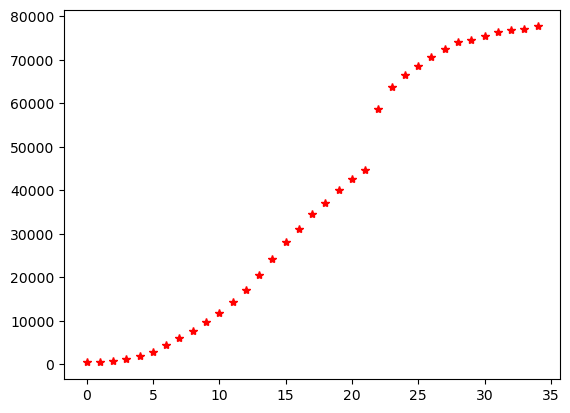

In [4]:
def cumulator(cas):
    cumul=[cas[0]]
    for c in cas[1:len(cas)]:
        cumul.append(cumul[-1]+c)
    cumul=array(cumul)    
    return cumul

nj=35
cumul=cumulator(china[:nj])
plot(cumul,'r*')

## modèle logistique généralisé (MLG)

Un modèle pouvant possiblement convenir pour ajuster ces données est le modèle logistique généralisé selon lequel

$$ Yc(t)=\dfrac{K}{(1+\mathrm{exp}(-r(t-t_m)))^{1/\alpha}} $$

Dans cette équation $Yc$ est le nombre de cas cumulés et $t$ le temps en jour. Les paramètres de cet ajustement sont $K$, $r$, $t_m$ et $\alpha$. 

1. Ecrire une fonction Y qui connaissant t ainsi que les paramètres d'ajustement renvoie la valeur de $Yc$

2. Pour mieux comprendre le rôle de ces paramètres, vous allez tracer pour 150 jours sur une même figure l'influence de chacun des paramètres les autres étant constants. Cette figure sera donc composée de 4 sous-figures. Vous prendrez comme valeurs de référence : $K=2000$, $r=0.25$,$t_m=20$ et $\alpha=1$

Vous ferez varier les valeurs des variables conformément au tableau ci-dessous :

| | min | max | nombre de valeurs|
| --- | --- | --- | --- |
| $K$ | 1000 | 5000 | 5 |
| $r$ | 0.1 | 0.5 | 5 |
| $t_m$ | 10 | 50 | 5 |
| $\alpha$ | 0.8 | 1.2 | 5 |


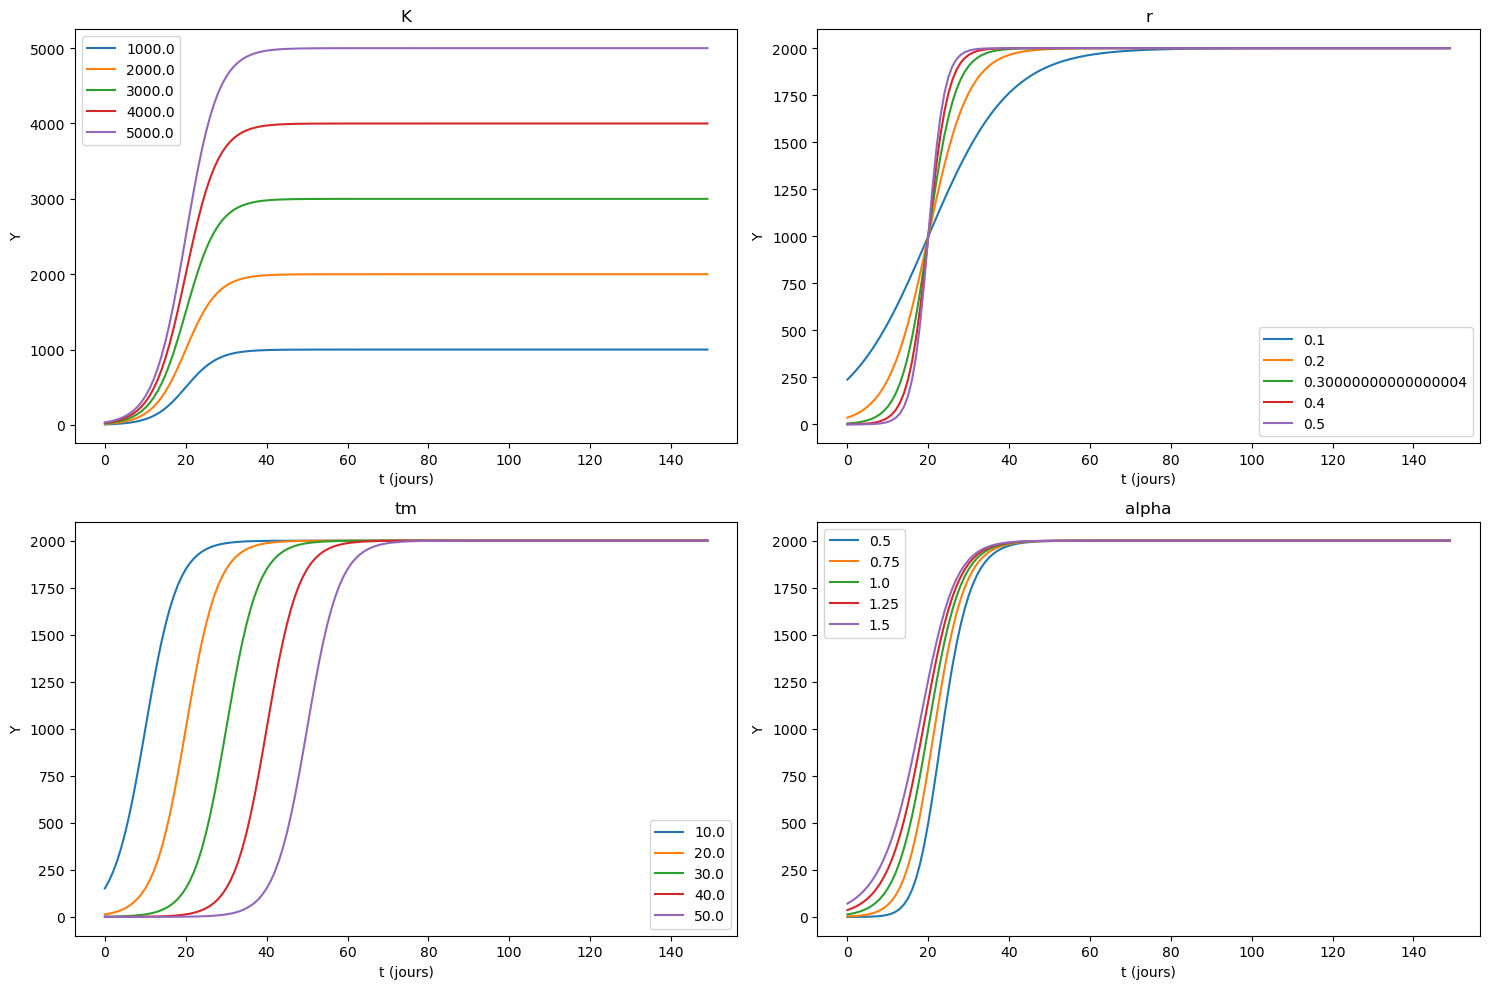

In [21]:
from scipy.optimize import *
def Y(t,K,r,tm,alp):
    return K*(1+exp(-r*(t-tm)))**(-1/alp)

ref=[2000,0.25,20,1]
K,r,tm,alp=ref

figure(figsize=(15, 10))
# Définition de 4 zones de traçage (3 zones sur une première ligne et une grande zone sur une deuxième ligne)

# Première ligne
ax1 = subplot(221)   
ax2 = subplot(222)
ax3 = subplot(223)
ax4 = subplot(224)


K,r,tm,alp=ref
t=arange(150)
for K in linspace(1000,5000,5):
    ax1.plot(t,Y(t,K,r,tm,alp),label=str(K))
ax1.set_xlabel('t (jours)')
ax1.set_ylabel('Y')
ax1.set_title('K')
ax1.legend()

K,r,tm,alp=ref
t=arange(150)
for r in linspace(0.1,0.5,5):
    ax2.plot(t,Y(t,K,r,tm,alp),label=str(r))
ax2.set_xlabel('t (jours)')
ax2.set_ylabel('Y')
ax2.set_title('r')
ax2.legend()

K,r,tm,alp=ref
t=arange(150)
for tm in linspace(10,50,5):
    ax3.plot(t,Y(t,K,r,tm,alp),label=str(tm))
ax3.set_xlabel('t (jours)')
ax3.set_ylabel('Y')
ax3.set_title('tm')
ax3.legend()

K,r,tm,alp=ref
t=arange(150)
for alp in linspace(0.5,1.5,5):
    ax4.plot(t,Y(t,K,r,tm,alp),label=str(alp))
ax4.set_xlabel('t (jours)')
ax4.set_ylabel('Y')
ax4.set_title('alpha')
ax4.legend()

tight_layout()

3. Trouver les paramètres d'ajustement par un MLG correspondant à l'évolution du nombre de cas cumulés en Chine. Il faut ajouter des contraintes sur les limites (bounds en anglais) pour les empécher d'être négatives. Il faut également initialiser le processus de recherche des paramètres par des valeurs bien choisies. Vous pouvez faire ce chois en comparant les 4 courbes que vous venez de tracer avec la courbe "expérimentale" pour la Chine.

4. Vous pourrez à partir de la valeur de $r$, calculer le fameux $R_0$ donné par les médias qui correspond au nombre de cas secondaires engendrés par une personne contaminée. Il est donné par la formule $R_0=\mathrm{exp}(rT)$ où $T$ où T est le temps moyen entre le début des symptômes pour le premier infecté et celui pour les seconds infectés. Dans l'étude concerné, $T=5.18$

In [26]:
t=arange(nj)
popt,cov=curve_fit(Y,t,cumul,p0=(70000,0.2,20,0.5),bounds=([0,0,0,0],+inf))
K,r,tm,alp=popt
print(K,r,tm,alp)
R0=exp(5.18*r)
print('R0='+str(R0))

79696.95480703752 0.27467779498698913 20.656964670529113 1.5235187144366005
R0=4.148849131336149


5. Tracer sur le même graphique, l'évolution expérimentale (croix rouges) sur 35 jours et l'évolution ajustée sur 150 jours.

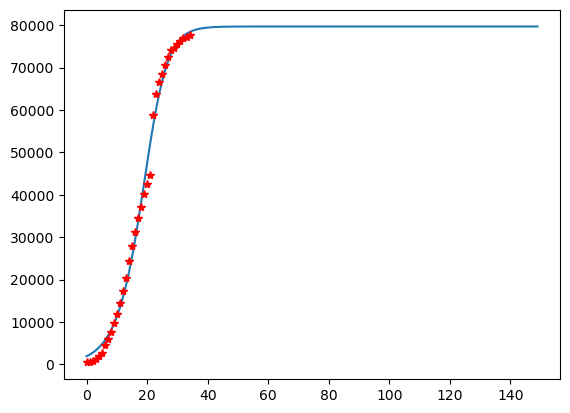

In [35]:
tt=arange(150)
plot(tt,Y(tt,K,r,tm,alp))
plot(cumul,'r*')

## Détermination du seuil à partir duquel on dépasse 99 % du nombre d'infectés potentiels

Si on considère $K$ comme la valeur maximale du nombre de personnes infectées au total. On voudrait savoir quand on atteint un cumul du nombre de cas égal à 0.99$K$.

In [33]:
from scipy.optimize import *

def annul(t,K,r,tm,alp):
    return Y(t,K,r,tm,alp)-0.99*K

t0=50
res=fsolve(annul,t0,args=(K,r,tm,alp))
print(res)

[35.84370708]


## Détermination de la date de fin d'épidémie à partir de l'ajustement

Il a été défini que l'on peut considérer que l'épidémie est terminée quand aucun nouveau cas n'apparît durant plus de 3 mois consécutifs (soit environ 90 jours).

1. A partir de la courbe ajuster, contruire en diagramme barre l'évolution du nombre de cas journalier sur 150 jours.

<BarContainer object of 150 artists>

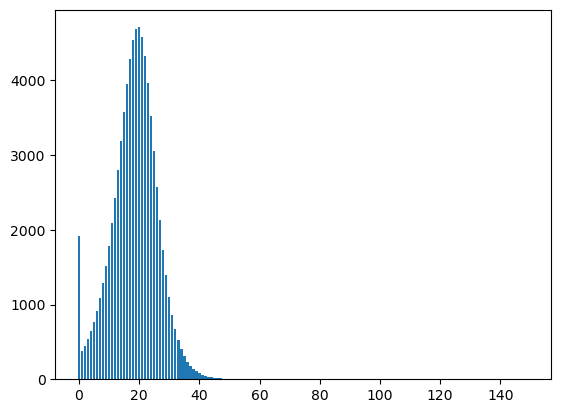

In [29]:
nj=150
cas=[Y(0,K,r,tm,alp)]
for t in range(1,nj):
    cas.append(Y(t,K,r,tm,alp)-Y(t-1,K,r,tm,alp))
cas=array(cas)
bar(arange(nj),cas)

2. En déduire la date théorique de fin d'épidémie. (même si votre calcul est approximatif, nous voulons un ordre d'idée ... nous faisons ici du python pas de l'épidémiologie de haut niveau)

In [30]:
j=1
while  cas[j] > 1e-6:
    j=j+1
print(j)

107


## De l'influence des données sur les résultats d'un ajustement à vocation prédictive

Le fichier dataWonderland.csv contient des données pour un pays merveilleux appelé Wonderland. Il est au même format que celui de la Chine mais contient l'évolution sur 100 jours. Le but de cette partie est de s'intéresser à la robustesse de l'ajustement que l'on effectue et notamment de l'influence du nombre de jours d'épidémie servant à l'ajustement. Nous appellerons ce nombre de jours d'étude $n_j$

1. Lire les données et tracer le nombre de cas cumulés en fonction du nombre de jours avec des étoiles rouges.


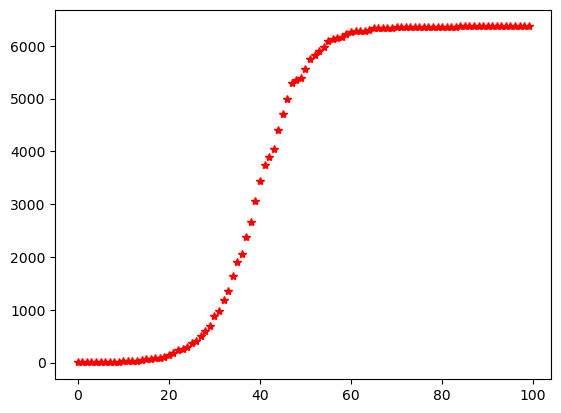

In [36]:
t,cas=genfromtxt('dataWonderland.csv',delimiter=',',unpack=True)
Yp=cumulator(cas)
plot(t,Yp,'r*')

2. Dans un premier temps, effectuer un ajustement de Y en ne considérant que ses 50 premières valeurs ($n_j=50$)
3. Tracer la comparaison "expérience"-modèle


6292.276478488594 0.1997245009372457 39.65261685114986 1.033554873005939


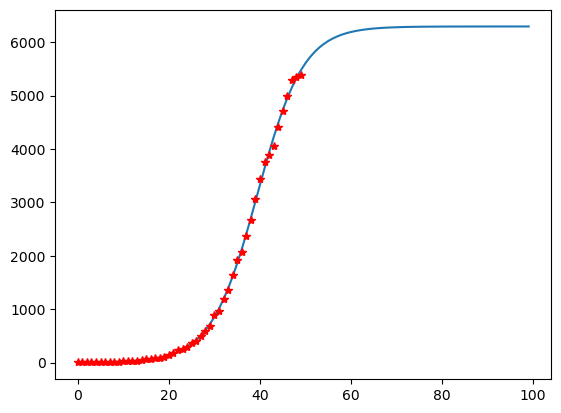

In [40]:
nj=50
t=arange(nj)
#popt,cov=curve_fit(Y,t,Yp[:nj],maxfev=10000, bounds=([0,0,0,0],+inf))
popt,cov=curve_fit(Y,t,Yp[:nj],bounds=([0,0,0,0],+inf))
K,r,tm,alp=popt
print(K,r,tm,alp)
t=arange(len(Yp))
plot(t,Y(t,K,r,tm,alp))
plot(Yp[:nj],'r*')

4. En vous inspirant de la question précédente, tracer sur un même graphique les courbes d'ajustement pour des valeurs de $n_j$ allant de 20 à 60 avec un pas de 10. Vous veillerez à légender correctement votre figure afin de pouvoir l'analyser correctement.

1534.1289755033665 0.107969430771527 27.184196936542822 0.46857446480731
5843.089339321874 0.12716578810891815 36.58201218940419 0.6022972862150496
7931.3053502241355 0.1652616766850923 40.37471846274905 0.8437594975571931
6292.276478488594 0.1997245009372457 39.65261685114986 1.033554873005939
6355.19505788631 0.19273916286607218 39.34426748780077 0.9744930763335669


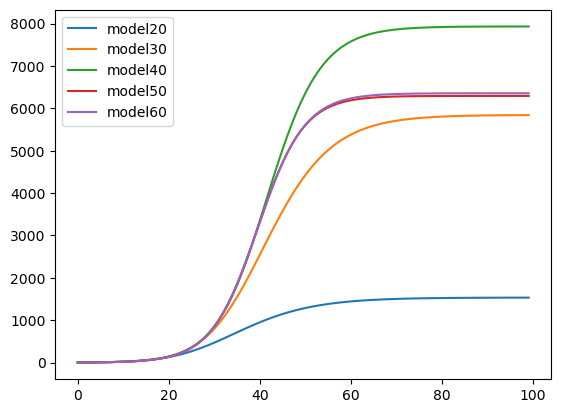

In [41]:
for nj in range(20,70,10):
    t=arange(nj)
    popt,cov=curve_fit(Y,t,Yp[:nj],bounds=([0,0,0,0],+inf))
    K,r,tm,alp=popt
    print(K,r,tm,alp)
    t=arange(len(Yp))
    plot(t,Y(t,K,r,tm,alp),label='model'+str(nj))
#plot(t,Y(t,6367,0.19,44.7,0.99))
#plot(Yp[:nj],'r*')
legend()

5. Clairement, le nombre de jours qui servent à l'ajustement a un rôle important. Dans le cas du Wonderland, estimer la valeur de $n_j$ à partir de laquelle le moèle peut être considéré fiable. On pourra par exemple considérer que le modèle est fiable quand pour 2 valeurs successives de $n_j$ l'écart relatif entre les 2 valeurs successives de $K$ correspondantes est inférieur à 5 %. AIDE : Pour que cela marche, il faut ajouter l'option maxfev=10000 à l'appel de curve_fit.

6. tracer alors la courbe "expérimentale" et son ajustement.

33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
nombre de jours 49
6596.1084091325165 0.18062467081511013 39.08807145926984 0.8922271682289346


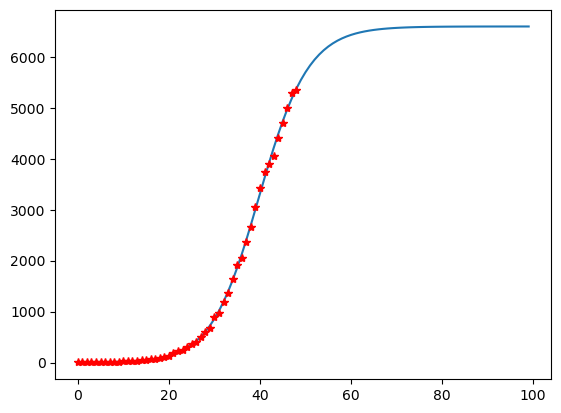

In [45]:
nj=33
crit=10
while(crit>0.05):
    t=arange(nj)
    popt,cov=curve_fit(Y,t,Yp[:nj],maxfev=10000,bounds=([0,0,0,0],+inf))
    #popt,cov=curve_fit(Y,t,Yp[:nj],bounds=([0,0,0,0],+inf))
    K1,r,tm,alp=popt
    t=arange(nj+1)
    #popt,cov=curve_fit(Y,t,Yp[:nj+1],bounds=([0,0,0,0],+inf))
    popt,cov=curve_fit(Y,t,Yp[:nj+1],maxfev=10000,bounds=([0,0,0,0],+inf))
    K2,r,tm,alp=popt
    crit=abs((K1-K2)/K1)
    print(nj)
    nj=nj+1

print('nombre de jours',nj)
t=arange(nj)
#popt,cov=curve_fit(Y,t,Yp[:nj],maxfev=10000, bounds=([0,0,0,0],+inf))
popt,cov=curve_fit(Y,t,Yp[:nj],bounds=([0,0,0,0],+inf))
K,r,tm,alp=popt
print(K,r,tm,alp)
t=arange(len(Yp))
plot(t,Y(t,K,r,tm,alp),label='model'+str(nj))
plot(arange(nj),Yp[:nj],'r*')